In [1]:
def getCountOfLinks(body):
    internalUrls = []
    internaltoSEUrls = []
    externalUrls = []
    urls = extractor.find_urls(body)
    for i in range(0,len(urls)):
        if("stackoverflow" in urls[i].lower()):
            internalUrls.append(urls[i].lower())
        elif("stackexchange" in urls[i].lower()):
            internaltoSEUrls.append(urls[i].lower())
        else:
            externalUrls.append(urls[i].lower())
    return [internalUrls, internaltoSEUrls, externalUrls]

In [2]:
from urllib.parse import urlparse
def getDomainsOfExternalLinks(externalUrls):
    domainDict = {}
    for i in range(0, len(externalUrls)):
        if not (externalUrls[i].startswith('//') or externalUrls[i].startswith('http://') or externalUrls[i].startswith('https://')):
            externalUrls[i] = '//' + externalUrls[i]
        domain = urlparse(externalUrls[i]).netloc
        domain = domain.lower()
        if domain in domainDict.keys(): 
            existingCount = domainDict[domain] + 1
            domainDict.update({domain: existingCount})
        else: 
            domainDict[domain] = 1
    return domainDict

In [7]:
import re
from urlextract import URLExtract
import pandas as pd
import numpy as np

linksInQuesCount = 0
linksInAnsCount = 0
extractor = URLExtract()
internalUrlsInQues = []
externalUrlsInQues = []
internaltoSEUrlsInQues = []
internalUrlsInAns = []
externalUrlsInAns = []
internaltoSEUrlsInAns = []

def _removeNonAscii(text):
    return "".join([i if ord(i) < 128 else ' ' for i in text])
    
for posts in pd.read_csv("../example/PostsForLinkAnalysis.csv", chunksize = 50000):
    ques = posts[posts['PostTypeId'] == 1]
    ans = posts[posts['PostTypeId'] == 2]
    for i in ques.index:
        try:
            list1 = getCountOfLinks(_removeNonAscii(ques['Body'][i]))
            internalUrlsInQues += list1[0]
            internaltoSEUrlsInQues += list1[1]
            externalUrlsInQues += list1[2]
        except:
            continue
    for i in ans.index:
        try:
            list2 = getCountOfLinks(_removeNonAscii(ans['Body'][i]))
            internalUrlsInAns += list2[0]
            internaltoSEUrlsInAns += list2[1]
            externalUrlsInAns += list2[2]
        except:
            continue
    print('Batch completed')

print('All batches completed')

Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch completed
Batch co

In [8]:
internalUrlsInQues = list(filter(None, internalUrlsInQues))
internaltoSEUrlsInQues = list(filter(None, internaltoSEUrlsInQues))
externalUrlsInQues = list(filter(None, externalUrlsInQues))
linksInQuesCount = len(internalUrlsInQues) + len(internaltoSEUrlsInQues) + len(externalUrlsInQues)

internalUrlsInAns = list(filter(None, internalUrlsInAns))
internaltoSEUrlsInAns = list(filter(None, internaltoSEUrlsInAns))
externalUrlsInAns = list(filter(None, externalUrlsInAns))
linksInAnsCount = len(internalUrlsInAns) + len(internaltoSEUrlsInAns) + len(externalUrlsInAns)

In [5]:
comments = pd.read_csv("../example/Comments.csv")
linksInCommentsCount = 0
internalUrlsInComments = []
externalUrlsInComments = []
internaltoSEUrlsInComments = []
for i in comments.index:
    body = comments['Text'][i]
    try:
        urls = extractor.find_urls(_removeNonAscii(str(body)))
        for i in range(0,len(urls)):
            if("stackoverflow" in urls[i]):
                internalUrlsInComments.append(urls[i])
            elif("stackexchange" in urls[i]):
                internaltoSEUrlsInComments.append(urls[i])
            else:
                externalUrlsInComments.append(urls[i])
    except Exception:
        continue
internalUrlsInComments = list(filter(None, internalUrlsInComments))
internaltoSEUrlsInComments = list(filter(None, internaltoSEUrlsInComments))
externalUrlsInComments = list(filter(None, externalUrlsInComments))

linksInCommentsCount = len(internalUrlsInComments) + len(internaltoSEUrlsInComments) + len(externalUrlsInComments)

Text(0.5, 0, 'Links in Comments')

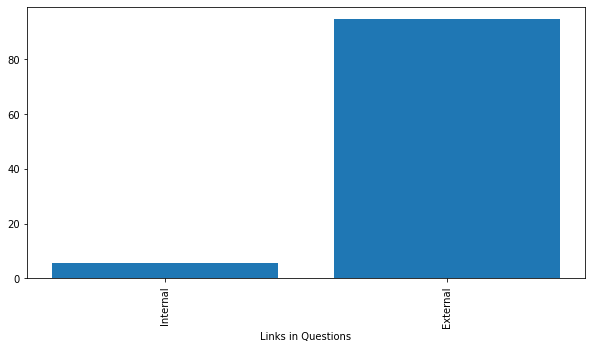

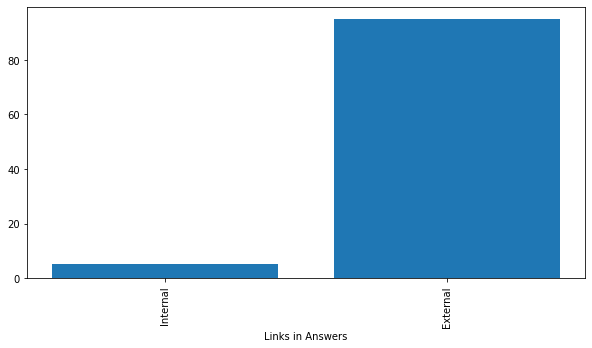

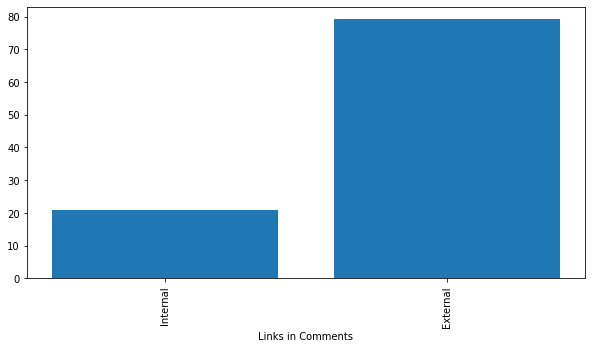

In [9]:
import matplotlib.pyplot as plt
#Bar graph for categories
#As internalToSEUrls are insignificant, they are not considered for the bar graph
keys = ['Internal', 'External']
totalInQues = len(internalUrlsInQues) + len(externalUrlsInQues)
valueQues1 = round((len(internalUrlsInQues) / totalInQues) * 100, 2)
valueQues2 = round((len(externalUrlsInQues) / totalInQues) * 100, 2)
values = [valueQues1, valueQues2]
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys, values)
plt.xlabel('Links in Questions')

totalInAns = len(internalUrlsInAns) + len(externalUrlsInAns)
valueAns1 = round((len(internalUrlsInAns) / totalInAns) * 100, 2)
valueAns2 = round((len(externalUrlsInAns) / totalInAns) * 100, 2)
values = [valueAns1, valueAns2]
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys, values)
plt.xlabel('Links in Answers')

totalInComments = len(internalUrlsInComments) + len(externalUrlsInComments)
valueComments1 = round((len(internalUrlsInComments) / totalInComments) * 100, 2)
valueComments2 = round((len(externalUrlsInComments) / totalInComments) * 100, 2)
values = [valueComments1, valueComments2]
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys, values)
plt.xlabel('Links in Comments')

<BarContainer object of 20 artists>

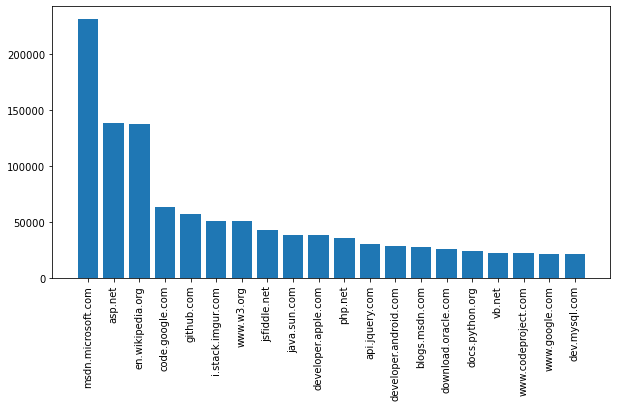

In [10]:
totalExternalLinks = []
for i in range(0, len(externalUrlsInQues)):
    totalExternalLinks.append(externalUrlsInQues[i])
for i in range(0, len(externalUrlsInAns)):
    totalExternalLinks.append(externalUrlsInAns[i])
for i in range(0, len(externalUrlsInComments)):
    totalExternalLinks.append(externalUrlsInComments[i])

domainDict = getDomainsOfExternalLinks(totalExternalLinks)

top20Domains= dict(sorted(domainDict.items(), key = lambda item: item[1], reverse=True)[:20])

#Bar graph of top 20 domains in external links
keys = top20Domains.keys()
values = top20Domains.values()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys, values)

([<matplotlib.patches.Wedge at 0x280abcfa520>,
 [Text(0.8985584827053631, 0.6345018937388885, 'Ques'),
  Text(-1.0969250853751702, 0.08219097927799514, 'Ans'),
  Text(0.8486373458499934, -0.6998675983560597, 'Comments')],
 [Text(0.4901228087483798, 0.34609194203939375, '19.6%'),
  Text(-0.5983227738410019, 0.0448314432425428, '58.5%'),
  Text(0.46289309773636, -0.3817459627396689, '22.0%')])

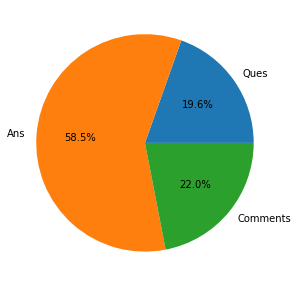

In [8]:
#Logic to get percent of links in questions, answers and comments
total = linksInQuesCount + linksInAnsCount + linksInCommentsCount
dictOfPercen = {'Ques' : (linksInQuesCount/total)*100,
              'Ans' : (linksInAnsCount/total)*100,
              'Comments' : (linksInCommentsCount/total)*100}
keys = dictOfPercen.keys()
values = dictOfPercen.values()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.pie(values,  labels = keys, autopct='%1.1f%%',)

In [22]:
getCountOfLinks(_removeNonAscii("<p>Just use the <code>--python</code> (or short <code>-p</code>) option when creating your virtualenv instance to specify the Python executable you want to use, e.g.:</p> <pre><code>virtualenv --python=/usr/bin/python2.6 &lt;path/to/new/virtualenv/&gt; </code></pre> <p>N.B. For <strong>Python 3.3</strong> or later, refer to The Aelfinn's <a href='https://stackoverflow.com/a/39713544/1450294'>answer</a> below.</p>"))

[['https://stackoverflow.com/a/39713544/1450294'], [], []]

([<matplotlib.patches.Wedge at 0x22705f03310>,
 [Text(0.7512983217508826, 0.803461779883964, 'Ques'),
  Text(-0.9801014161751986, -0.49940085503668313, 'Ans'),
  Text(1.0341800182104142, -0.374795530835558, 'Comments')],
 [Text(0.40979908459139053, 0.4382518799367076, '26.1%'),
  Text(-0.5346007724591992, -0.2724004663836453, '62.9%'),
  Text(0.5640981917511348, -0.20443392591030435, '11.1%')])

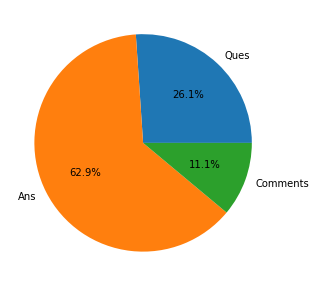

In [11]:
#Logic to get percent of links in questions, answers and comments
total = linksInQuesCount + linksInAnsCount + linksInCommentsCount
dictOfPercen = {'Ques' : (linksInQuesCount/total)*100,
              'Ans' : (linksInAnsCount/total)*100,
              'Comments' : (linksInCommentsCount/total)*100}
keys = dictOfPercen.keys()
values = dictOfPercen.values()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.pie(values,  labels = keys, autopct='%1.1f%%',)